# **SME0142 - Álgebra Linear e Aplicações**

## **Trabalho Final**

### **Docente: Maria Luísa Bambozzi de Oliveira**

## Grupo:  
João Pedro Hamata - 13672001 <br>
Leonardo Ishida - 12873424

# Vamos importar as bibliotecas necessárias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Lendo a imagem e transformando-a em escala de cinza

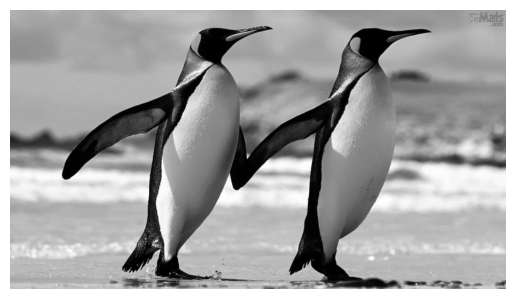

In [6]:
X = imread('p-imperador.jpg')
X_monocromatico = np.mean(X, -1)

img = plt.imshow(X_monocromatico)
img.set_cmap('gray')
plt.axis('off')
plt.show()

# Decomposição da imagem utilizando SVD

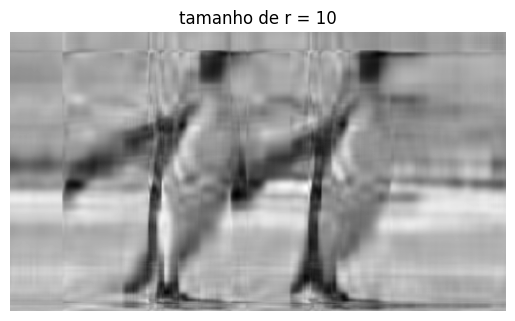

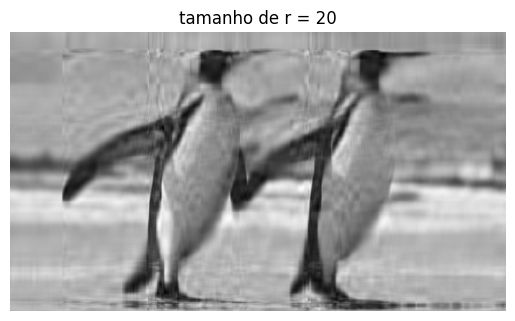

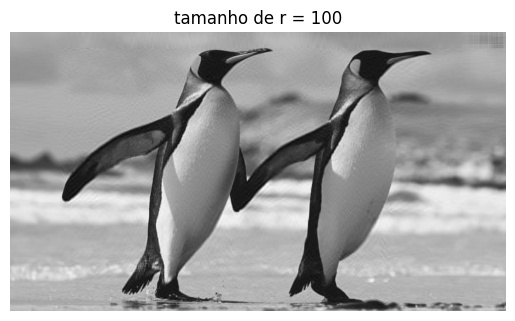

In [13]:
u, s, vt = np.linalg.svd(X_monocromatico, full_matrices=False)

# Queremos que nossas matrizes tenham dimensoes de ate r para economizar no espaco de armazenamento
k = 0
for r in [10, 20, 100]:
    aproximacao = u[:, :r] @ np.diag(s[:r]) @ vt[:r, :]

    # incrementando a quantidade de objetos a serem impressos
    plt.figure(k+1)
    k += 1

    # comandos para impressao
    img = plt.imshow(aproximacao)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title(f'tamanho de r = {r}')
    plt.show()


In [ ]:
# Agora, vamos para o caso em que nossa matriz apresenta ruido

sigma = 1
Xnoisy = X + sigma * np.random.randn(*X.shape)
plt.imshow(Xnoisy)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

In [ ]:
U, S, VT = np.linelg.svd(Xnoisy, full_matrices=0)
N = Xnoisy.shape[0]
cutoff = (4/np.sqrt(3) * np.sqrt(N) * sigma)
r = np.max(np.where(S > cutoff)) # Keep modes w/ sig > cutoff

In [ ]:
Xclean = U[:, : (r+1)] @ np.diag(S[: (r+1)]) @ VT[: (r+1), :]
plt.imshow(Xclean)
plt.set_cmao('gray')
plt.axis('off')
plt.show()
cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90%


In [ ]:
X90 = U[:, : (r90+1)] @ np.diag(S[: (r90+1)]) @ VT[: (r90+1), :]
plt.imshow(X90)
plt.set_cmp('gray')
plt.axis('off')
plt.show()

In [ ]:
fig1, ax1 = plt.subplot(1)

ax1.semi_logy(S, '-o', color='k', LineWidth=2)
ax1.semi_logy(np.diag(S : (r+1)), 'o', color='r', LineWidth=2)
ax1.plot(np.array([-20, N=20]), np.array([cutoff, cutodd]), '--') # terminar
react = patches.Rectangle((-5, 20), 100, 200, LineWidth=2, LineStyle='--') # terminar
ax1.add_patch(react)
plt.xlim((-10, 610))
plt.ylim((0.003, 300))
ax1.grid()
plt.show()